In [1]:
from icecream import ic

# Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.
День	Улица	Гараж
Понедельник	80	100
Вторник	98	82
Среда	75	105
Четверг	91	89
Пятница	78	102


In [ ]:
import numpy as np

outdoor_storage = np.array([80, 98, 75, 91, 78])
garage_storage = np.array([100, 82, 105, 89, 102])
ic(outdoor_storage)
ic(garage_storage)

# Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

Коэффициент корреляции Пирсона (линейный коэффициент корреляции) – мера связи для двух непрерывных или характеризующих отношения переменных.

Обозначение:
− для выборки – r,
− для генеральной совокупности – ρ.

Принимает значения от –1 до +1.
0 (нуль) – отсутствие связи между переменными.

--------------------------------------------------------------------------------------
Частая нулевая гипотеза для корреляционного анализа: переменные не связаны (r = 0).
Альтернативная гипотеза: r ≠ 0.
--------------------------------------------------------------------------------------

In [ ]:
print(f'Матрица коэффициентов корреляции: \n{np.corrcoef(outdoor_storage, garage_storage)}')
print(f'Коэффициент корреляции между двумя переменными: {np.corrcoef(outdoor_storage, garage_storage)[0, 1]}')

Коэффициент корреляции практически равен –1, что означает сильную отрицательную корреляцию.

NameError: name 'outdoor_storage' is not defined

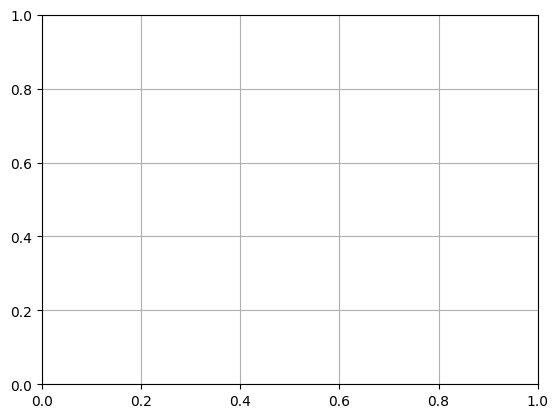

In [3]:
import matplotlib.pyplot as plt

plt.grid()
plt.scatter(outdoor_storage, garage_storage, marker='o')
plt.title('Диаграмма рассеивания данных о хранении автомобилей', fontsize='16')
plt.xlabel('Стоянка на улице')
plt.ylabel('Стоянка в гараже')
print('На получившимся графике мы видим сильную отрицательную корреляцию')

# Найти и выгрузить данные.
# Вывести, провести предобработку и описать признаки.

The data comes from the spanish website PC componentes. The data was collected using Power Automate, more info on:
https://github.com/juanmerino89/laptops-data-cleaning

Fields included:

Laptop Name: The unique identifier or model name of the laptop.
Brand: Laptop brand.
Model: Laptop brand model.
CPU (Central Processing Unit): The processor brand, model, and other relevant details.
GPU (Graphics Processing Unit): The graphics card brand, model, and associated specifications.
RAM (Random Access Memory): The amount of memory available for multitasking.
Storage: The storage type (HDD, SSD) and capacity of the laptop.
Price: The cost of the laptop in the respective currency.

In [ ]:
import pandas as pd

data = pd.read_csv('../Datasets_for_work/Data_4/laptops.csv')
data

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
data['Storage type'] = data['Storage type'].fillna('NO')
data['GPU'] = data['GPU'].fillna('NO')
data['Screen'] = data['Screen'].fillna('NO')
data['Touch'] = data['Screen'].fillna('NO')

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

# Данные предобработанны

# Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.

In [ ]:
f_data = pd.DataFrame()
f_data['factorize_CPU'] = pd.factorize(data['CPU'])[0]  # факторизуем CPU
f_data['factorize_GPU'] = pd.factorize(data['GPU'])[0]  # факторизуем GPU
f_data['factorize_Brand'] = pd.factorize(data['Brand'])[0]  # факторизуем Brand
f_data['factorize_Status'] = pd.factorize(data['Status'])[0]  # факторизуем Status
f_data['factorize_Model'] = pd.factorize(data['Model'])[0]  # факторизуем Model
f_data['factorize_Storage_type'] = pd.factorize(data['Storage type'])[0]  # факторизуем Storage type
f_data['factorize_Touch'] = pd.factorize(data['Touch'])[0]  # факторизуем Touch
f_data['Screen'] = pd.factorize(data['Screen'])[0]  # факторизуем Screen
f_data['RAM'] = data['RAM']
f_data['Storage'] = data['Storage']
f_data['Price'] = data['Final Price']
for i in f_data:
    f_data[f'{i}'] = f_data[f'{i}'].astype(float)
f_data

In [ ]:
print(f"Матрица коэффициентов корреляции для RAM к цене: \n{np.corrcoef(f_data['RAM'], data['Final Price'])}")
print(f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['RAM'], data['Final Price'])[0, 1]}")

In [ ]:
print(f"Матрица коэффициентов корреляции для Screen size к цене: \n{np.corrcoef(f_data['Screen'], f_data['Price'])}")
print(f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['Screen'], f_data['Price'])[0, 1]}")

In [ ]:
print(f"Матрица коэффициентов корреляции для Storage к цене: \n{np.corrcoef(f_data['Storage'], f_data['Price'])}")
print(f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['Storage'], f_data['Price'])[0, 1]}")

In [ ]:
print(f"Матрица коэффициентов корреляции для CPU к цене: \n{np.corrcoef(f_data['factorize_CPU'], f_data['Price'])}")
print(f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['factorize_CPU'], f_data['Price'])[0, 1]}")

In [ ]:
print(f"Матрица коэффициентов корреляции для GPU к цене: \n{np.corrcoef(f_data['factorize_GPU'], f_data['Price'])}")
print(f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['factorize_GPU'], f_data['Price'])[0, 1]}")

In [ ]:
print(f"Матрица коэффициентов корреляции для Brand к цене: \n{np.corrcoef(f_data['factorize_Brand'], f_data['Price'])}")
print(
    f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['factorize_Brand'], f_data['Price'])[0, 1]}")

In [ ]:
print(
    f"Матрица коэффициентов корреляции для Status к цене: \n{np.corrcoef(f_data['factorize_Status'], f_data['Price'])}")
print(
    f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['factorize_Status'], f_data['Price'])[0, 1]}")

In [ ]:
print(f"Матрица коэффициентов корреляции для Model к цене: \n{np.corrcoef(f_data['factorize_Model'], f_data['Price'])}")
print(
    f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['factorize_Model'], f_data['Price'])[0, 1]}")

In [ ]:
print(
    f"Матрица коэффициентов корреляции для Storage type к цене: \n{np.corrcoef(f_data['factorize_Storage_type'], f_data['Price'])}")
print(
    f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['factorize_Storage_type'], f_data['Price'])[0, 1]}")

In [ ]:
print(f"Матрица коэффициентов корреляции для Touch к цене: \n{np.corrcoef(f_data['factorize_Touch'], f_data['Price'])}")
print(
    f"Коэффициент корреляции между двумя переменными: {np.corrcoef(f_data['factorize_Touch'], f_data['Price'])[0, 1]}")

In [ ]:
corr_matrix = f_data.corr().Price.to_frame().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

# Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.

In [ ]:
X = np.array(f_data[['RAM']], type(float))
y = np.array(f_data['Price'], type(float))
ic(X)
ic(y)


def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2 / len(y_pred))


def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2 / len(X) * np.sum((y - y_pred)) * (-1),
                     2 / len(X) * np.sum((y - y_pred) * (-X[:, 0]))])

In [ ]:
eps = 0.0001

w1 = 0
w0 = 0

learning_rate = 0.001

next_w1 = w1
next_w0 = w0

n = 10000
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0

    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_w1, cur_w0}| Следующая точка {next_w1, next_w0}")
    print(f"MSR {mserror(X, cur_w1, cur_w0, y)}")
    print('-' * 50)
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break
next_w0 = round(next_w0, 2)
next_w1 = round(next_w1, 2)
f_data['dy'] = f_data['RAM'] * next_w1 + next_w0

In [ ]:
f_data

In [ ]:
df = pd.DataFrame()
df['X'] = f_data['RAM'].astype(float)
df['y'] = f_data['Price'].astype(float)

n = df.shape[0]
summ_x = sum(df.X)
summ_y = sum(df.y)
summ_x2 = sum(df.X ** 2)
summ_xy = sum(df.X * df.y)

ic(n)
ic(summ_x)
ic(summ_y)
ic(summ_x2)
ic(summ_xy)

b1 = round((-(summ_x * (summ_y / n)) + (summ_xy)) / (summ_x * (-summ_x / n) + (summ_x2)), 2)
b0 = round(summ_y / n - summ_x / n * b1, 2)

df['dy'] = df.X * b1 + b0
mse = (sum((df.y - df.dy) ** 2)) / n

ic(b1)
ic(b0)
ic(mse)

df

# Визуализировать регрессию на графике

In [ ]:
fig = plt.figure(figsize=(16, 9))
plt.plot(df.X, df.dy, linewidth='2', color='red', label=f'Модель регресии ВТ power \n{b0} + {b1}x')
plt.plot(df.X, f_data.dy, '--g', linewidth='2', color='blue',
         label=f'Модель регресии Методичка \n{next_w0}+ {next_w1}x')
plt.scatter(df.X, df.y)
plt.xlabel('RAM')
plt.ylabel('Price')
plt.grid()
plt.legend(prop={'size': 20})

# Загрузить данные: 'insurance.csv'.
# Вывести и провести предобработку.
# Вывести список уникальных регионов.

In [ ]:
import pandas as pd

dataset = pd.read_csv('../Datasets_for_work/Data_4/insurance.csv')
dataset

In [ ]:
dataset.describe()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.info()

In [ ]:
dataset.region.unique()

In [ ]:
dataset.region.nunique()

In [ ]:
dataset.region.value_counts()

# Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI),
# используя первый способ, через библиотеку Scipy.

Общая сумма квадратов SST получена из двух источников: межгрупповая сумма квадратов SSB (характеристика, показывающая насколько групповые средние отклоняются от общего среднего) и внутригрупповая сумма квадратов SSW (сумма квадратов отклонений от среднего внутри каждой из групп).

Межгрупповая дисперсия MSB, объяснённая влиянием фактора, характеризует рассеивание значений между градациями (группами) вокруг средней всех данных.
Внутригрупповая дисперсия MSW, необъяснённая, характеризует рассеивание данных внутри градаций фактора (групп) вокруг средних значений этих групп.

In [ ]:
import scipy.stats as stats

np.random.seed(12)
regions = dataset.region.unique()

frame = pd.DataFrame({'region': dataset.region, 'bmi': dataset.bmi})
frame

In [ ]:
groups = frame.groupby('region').groups

In [ ]:
southeast = dataset.bmi[groups["southeast"]]
southwest = dataset.bmi[groups['southwest']]
northwest = dataset.bmi[groups['northwest']]
northeast = dataset.bmi[groups['northeast']]

In [ ]:
f_statistic, p_value = stats.f_oneway(southeast, southwest, northwest, northeast)

# Вывод результатов теста
print("\nРезультаты однофакторного ANOVA-теста:")
print(f"F-статистика: {f_statistic}")
print(f"P-значение: {format(p_value, '.30f')}")
print(
    'Поскольку p-значение меньше 0,05. Это означает, что фактор region оказывает статистически значимое влияние на bmi!!!')

# Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI),
# используя второй способ, с помощью функции anova_lm() из библиотеки statsmode.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('bmi ~ region', data=frame).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

# С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.

 0.03 < 0.05: гипотеза отклоняется;
 0.06 > 0.05: гипотеза принимается;
 0.015 < 0.05: гипотеза отклоняется.

In [ ]:
t_dataframe = pd.DataFrame(columns=['Группы', 'p-value', 'Гипотеза'])
pairs_for_comparison = []

for i in regions:
    for j in regions:
        if i != j and [i, j] not in pairs_for_comparison and [j, i] not in pairs_for_comparison:
            pairs_for_comparison.append([i, j])
m = len(pairs_for_comparison)
for i, j in pairs_for_comparison:
    group = f'{i} - {j}'
    p_value = stats.ttest_ind(dataset.bmi[groups[i]], dataset.bmi[groups[j]])
    if p_value[1] > (0.05 / m):
        hypothesis = 'Принимается'
    else:
        hypothesis = 'Отклоняется'
    # new_row = {'Группы':group, 'p-value':p_value[1], 'Гипотеза':hypothesis}
    new_row = [group, format(p_value[1], '.10f'), hypothesis]
    t_dataframe.loc[len(t_dataframe.index)] = new_row
    print(group)
    print('statistic', format(p_value[0], '.10f'))
    print('pvalue', format(p_value[1], '.10f'))
    print()

t_dataframe

# Выполнить пост-хок тесты Тьюки и построить график.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=dataset.bmi, groups=dataset.region, alpha=0.5)
tukey.plot_simultaneous()
plt.vlines(x=29, ymin=-0.5, ymax=4.5, color='red')
tukey.summary()

Видим, что доверительные интервалы white-hispanic и white-asian перекрываются, поэтому пост-хок тесты показали что различия между ними не существенные.

# Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI),
# используя функцию anova_lm() из библиотеки statsmodels

In [ ]:
anova_two = pd.DataFrame()
anova_two['region'] = dataset.region
anova_two['sex'] = dataset.sex
anova_two['bmi'] = dataset.bmi
anova_two

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=anova_two).fit()
sm.stats.anova_lm(model, typ=2)

Мы можем видеть следующие p-значения для каждого из факторов в таблице:
• region: p-значение = 0,0000000000000000000000022
• sex: p-значение = 0,1126940000000000025037750
• region * sex: p-значение = 0,2819876000000000049183768

In [ ]:
x = 1.650655e-01
print(format(x, '.25f'))

Поскольку p-значения для региона 0,05, это означает, что фактор оказывают статистически значимое влияние на bmi.

А поскольку p-значение для эффекта взаимодействия (0,2819876000000000049183768) и sex составляет не менее 0,05, это говорит нам об отсутствии значительного эффекта взаимодействия между sex, sex и region.

#   Выполним пост-хок тест Тьюки для нашего примера, а также построим график с доверительными интервалами.

In [ ]:
anova_two['combo'] = anova_two['region'] + ' \ ' + anova_two['sex']
anova_two

In [ ]:
tukey = pairwise_tukeyhsd(endog = anova_two['bmi'], groups=anova_two['combo'], alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()